**TASK1 (by Guzeev Evgeny)** Create four random networks with 25, 50, 100 and 500 nodes. Set the average degree of each network to approximately 6. Calculate the number of clicks for all networks and provide a short analysis (Luke, 2017, p. 119).

In [ ]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Nodes,Largest,Number
<dbl>,<dbl>,<int>
25,4,29
50,3,33
100,3,36
500,3,39


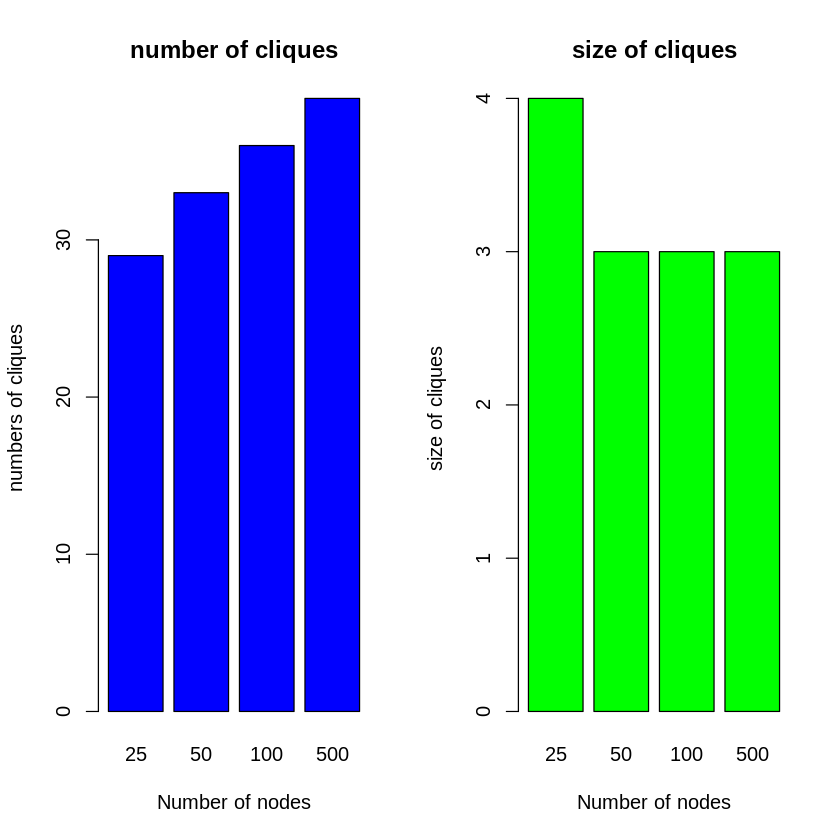

In [ ]:
library("igraph")


deg <- 6 # average degree
n_vect <- c(25,50,100,500)
numclq  <- sapply(n_vect, function(x)
 length(cliques(erdos.renyi.game(x, p.or.m=deg/(x-1), type="gnp" , directed=FALSE),min=3)))

lrgclq  <- sapply(n_vect, function(x)
 clique.number(erdos.renyi.game(x, p.or.m=deg/(x-1), type="gnp" , directed=FALSE)))

clqinfo <- data.frame(Nodes=nodes,Largest=lrgclq,Number=numclq)
clqinfo


 par(mfrow=c(1,2))
barplot(numclq, names.arg=n_vect,xlab = "Number of nodes", ylab = "numbers of cliques", col="blue", main = "number of cliques")
barplot(lrgclq, names.arg=n_vect,xlab = "Number of nodes", ylab = "size of cliques", col="green", main = "size of cliques")


**TASK 2** Compare community detection algorithms (Edge Betweenness, Walktrap, Optimal) on the example of the karate network  from the igraphdata package

Name,Modularity_com,Length_gr,Sizes_comm
<chr>,<dbl>,<int>,<int>
walktrap,0.3532216,34,5
label_prop,0.3281558,34,3
edge_betweenness,0.4012985,34,5
louvain,0.4188034,34,4


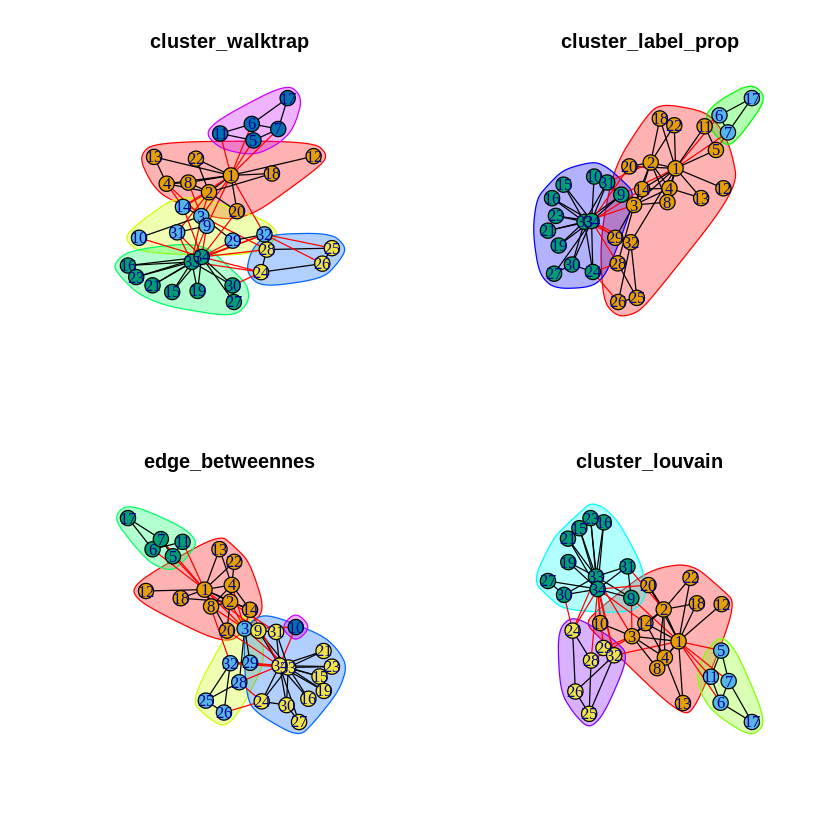

In [ ]:
library("igraph")


g<- make_graph("Zachary")

cw_karate <- cluster_walktrap(g)  
cl_karate <- cluster_label_prop(g)       
eb_karate <- cluster_edge_betweenness(g)
cl_lou <- cluster_louvain(g)

name<- c("walktrap", "label_prop", "edge_betweenness", "louvain")
modul <- c(modularity(cw_karate),
          modularity(cl_karate),
          modularity(eb_karate),
          modularity(cl_lou))

length_gr <- c(length(membership(cw_karate)),
               length(membership(cl_karate)),
               length(membership(eb_karate)),
               length(membership(cl_lou)))

sizes_community <-c(length(sizes(cw_karate)),
                    length(sizes(cl_karate)),
                    length(sizes(eb_karate)),
                    length(sizes(cl_lou)))

com_com <- data.frame(Name=name,Modularity_com=modul,Length_gr=length_gr, Sizes_comm=sizes_community)
com_com
par(mfrow=c(2,2))

plot(cw_karate, g, main="cluster_walktrap" )
plot(cl_karate, g, main="cluster_label_prop" )
plot(eb_karate, g,  main="edge_betweennes" )
plot(cl_lou, g,  main="cluster_louvain" )